##introduction to matplotlib

Looking for some light matplotlib reading? Look no further (or do, that's alright too):

http://matplotlib.org/

http://matplotlib.org/Matplotlib.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
from matplotlib import mlab

# this will make the figures *just show up* without a .show() call
%matplotlib inline

##easy tiger

Let's start simply by using the first example in the matplotlib guidebook.

Note that we'll retain references to the axes and figures we're working with. This will make it simpler to keep track of what we're doing in matplotlib and it will make it easier to eventually convert the figure with the plotly module.

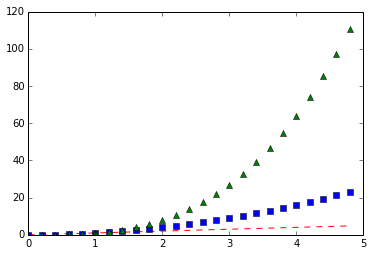

In [2]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
# the '_' is just conventional for "i don't care about this value"
fig, ax = plt.subplots()
_ = ax.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

##your ax is your friend

We'll mostly be creating/updating figures via the `axes` object we create, above just `ax`. Axes have a bunch of getter/setter methods associated with them which you can use to update the figure. For example let's set the axes titles.

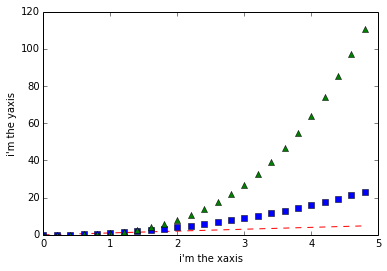

In [3]:
ax.set_xlabel("i'm the xaxis")
ax.set_ylabel("i'm the yaxis")
fig

##getp and setp

To look at available attributes on matplotlib objects, you can use `matplotlib.pyplot.getp`. To set these attributes, you can go ahead and use (you guessed it) `matplotlib.pyplot.setp`.

Let's use `setp` to set the axes title.

In [4]:
plt.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes = Axes(0.125,0.125;0.775x0.775)
    axes_locator = None
    axis_bgcolor = (1, 1, 1, 0)
    axisbelow = False
    children = [<matplotlib.axis.XAxis object at 0x10d679bd0>, <m...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    cursor_props = (1, (0.0, 0.0, 0.0, 1.0))
    data_ratio = 24.0
    default_bbox_extra_artists = [<matplotlib.axis.XAxis object at 0x10d679bd0>, <m...
    figure = Figure(480x320)
    frame_on = True
    geometry = (1, 1, 1)
    gid = None
    images = <a list of 0 AxesImage objects>
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 3 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox('array([[ 0.125,  0.125],\n       [ 0.9  ,

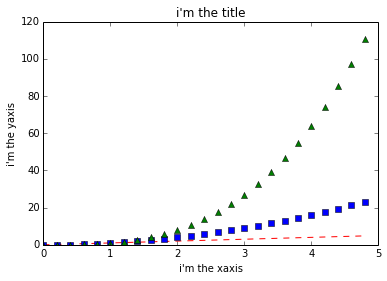

In [5]:
plt.setp(ax, title="i'm the title")
fig

##getters and setters

Most all of the attributes seen with `getp` have associated `get_*` and `set_*` methods bound to the parent objects.

Let's use `ax.set_xlim` to set new limits on our x data.

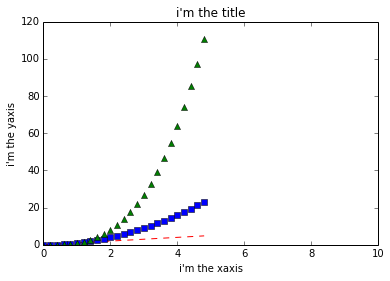

In [6]:
ax.set_xlim([0, 10])
fig

##figure conversion

A Plotly figure exists as JSON in storage. To represent a matplotlib figure in Plotly, we first convert the matplotlib figure object into a collection of `dicts` and `lists`.

###`*plot_mpl`

Just like `plot` and `iplot`, you can attempt to save and plot a matplotlib figure in Plotly by using `plot_mpl` and `iplot_mpl`. Under the hood, these functions first convert the matplotlib figures, *then* send them to Plotly.

Let's try it!

In [7]:
py.iplot_mpl(fig, filename='pycon_mpl_to_plotly')

##practice practice practice :)

* make a horizontal bar chart
* make a line chart
* make a bubble chart
* make a histogram
* make a log plot

Finally, convert all of these to Plotly figures!

##--> make some bars challenge <--

* instead, make this horizontal
* set the title to 'make some bars challenge'
* then label the 'x' axis, 'x axis' and the 'y' axis, 'y axis'

In [8]:
fig, ax = plt.subplots()
left = [1, 2, 3, 4, 5]
height = [2, 3, 4, 2, 1]
_ = ax.bar(left, height)

py.iplot_mpl(fig, filename='pycon_make_some_mpl_bars')

##--> make some lines challenge <--

* change the y limits to run from -2 to 2
* change the x limits to run from -2 to 2
* add traces `y=x`, `y=x - x**3/6`, and `y=x - x**3/6 + x**5/24` (the lower approximations)

In [9]:
fig, ax = plt.subplots()
x = np.linspace(-20, 20, num=200)
y = x - x**3/6 + x**5/24 - x**7/120
ax.plot(x, y)
py.iplot_mpl(fig, filename='pycon_make_some_mpl_lines')

##--> make a bubble chart challenge <--

* alter the bubble sizes with the `s` variable
* alter the color of the bubbles with the `c` variable
* change the opacity (alpha) to be 0.3

In [10]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
x = [np.random.randint(0, 100) for _ in xrange(500)]
y = [np.random.randint(0, 100) for _ in xrange(500)]
s = [np.random.randint(100, 1000) for _ in xrange(500)]
c = [np.random.choice(colors) for _ in xrange(500)]

fig, ax = plt.subplots()
ax.scatter(x, y)

py.iplot_mpl(fig, filename='pycon_make_some_mpl_bubbles')

##--> make a histogram challenge <--

* use `mlab.normpdf` to add a normal fit (use `mu=0` and `sigma=1`)

In [11]:
fig, ax = plt.subplots()

x = np.random.randn(2000)
n, bins, patches = ax.hist(x, 100, normed=1)
py.iplot_mpl(fig, filename='pycon_make_an_mpl_histogram')

##--> make a log plot challenge <--

* make *both* axes logarithmic instead of just `'x'`

In [12]:
fig, ax = plt.subplots()
x = [10**i for i in xrange(1, 10)]
y = [i**10 for i in x]
ax.semilogx(x, y, 'ro')
py.iplot_mpl(fig, filename='pycon_make_some_mpl_logs')

##challenge answers

###make some bars challenge

    fig, ax = plt.subplots()
    bottom = [1, 2, 3, 4, 5]
    width = [2, 3, 4, 2, 1]
    ax.barh(bottom, width)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_title('make some bars challenge')
    py.iplot_mpl(fig, filename='pycon_make_some_mpl_bars')
    

###make some lines challenge

    ax.plot(x, x)
    ax.plot(x, x - x**3/6)
    ax.plot(x, x - x**3/6 + x**5/24)
    ax.set_ylim([-2, 2])
    ax.set_xlim([-2, 2])
    py.iplot_mpl(fig, filename='pycon_make_some_mpl_lines')

###make some bubbles challenge

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=s, c=c, alpha=0.3)
    py.iplot_mpl(fig, filename='pycon_make_some_mpl_bubbles')

###make a histogram challenge

    mu, sigma = 0, 1
    y = mlab.normpdf( bins, mu, sigma)
    ax.plot(bins, y, 'r--', linewidth=2)
    py.iplot_mpl(fig, filename='pycon_make_an_mpl_histogram')

###make some logs challenge

    fig, ax = plt.subplots()
    x = [10**i for i in xrange(1, 10)]
    y = [i**10 for i in x]
    ax.loglog(x, y, 'ro')
    py.iplot_mpl(fig, filename='pycon_make_some_mpl_logs')